In [1]:
import pybamm as pb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pb.set_logging_level("INFO")

#Define the parameter values chemistry
parameter_values = pb.ParameterValues("Chen2020")

#Define the model
spm = pb.lithium_ion.SPMe()

# Experiment

experiment = pb.Experiment(["Discharge at 1C until 2.5 V"])


2022-12-02 09:55:18.744 - [INFO] base_model._build_model(572): Start building Single Particle Model with electrolyte
2022-12-02 09:55:18.831 - [INFO] base_battery_model.build_model(1019): Finish building Single Particle Model with electrolyte


In [5]:
spm.variables.search("lithiation")

Negative electrode extent of lithiation
Positive electrode extent of lithiation
X-averaged negative electrode extent of lithiation
X-averaged positive electrode extent of lithiation


In [6]:
cpe = spm.variables["Positive electrode volume-averaged concentration [mol.m-3]"]
cxa = spm.variables["X-averaged positive particle concentration [mol.m-3]"]


In [7]:
cpe.domain

['current collector']

In [8]:
cxa.domain

['positive particle']

In [9]:
for var, npts in spm.default_var_pts.items():
    print(var,'has', npts,'mesh points')

x_n has 20 mesh points
x_s has 20 mesh points
x_p has 20 mesh points
r_n has 20 mesh points
r_p has 20 mesh points
r_n_prim has 20 mesh points
r_p_prim has 20 mesh points
r_n_sec has 20 mesh points
r_p_sec has 20 mesh points
y has 10 mesh points
z has 10 mesh points
R_n has 30 mesh points
R_p has 30 mesh points


In [46]:
sim = pb.Simulation(spm)
sim.solve(t_eval=[0,3600])
solution = sim.solution

2022-12-02 11:28:03.703 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model with electrolyte
2022-12-02 11:28:03.877 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model with electrolyte
2022-12-02 11:28:03.879 - [INFO] discretisation.process_model(149): Start discretising Single Particle Model with electrolyte
2022-12-02 11:28:03.882 - [INFO] discretisation.remove_independent_variables_from_rhs(1199): removing variable Discharge capacity [A.h] from rhs
2022-12-02 11:28:04.099 - [INFO] discretisation.process_model(271): Finish discretising Single Particle Model with electrolyte
2022-12-02 11:28:04.099 - [INFO] base_solver.solve(703): Start solving Single Particle Model with electrolyte with CasADi solver with 'safe' mode
2022-12-02 11:28:04.108 - [INFO] base_solver.set_up(110): Start solver set-up
2022-12-02 11:28:04.141 - [INFO] base_solver.set_up(235): Finish solver set-up
2022-12-02 11:28:04.16

In [47]:
#Plot variables depending on R
output_vars = [
    
               "X-averaged positive particle concentration [mol.m-3]",
               "X-averaged negative particle concentration [mol.m-3]",
               "Terminal voltage [V]",
               "Positive particle surface concentration [mol.m-3]",
               "Negative particle surface concentration [mol.m-3]",
               "Electrolyte concentration [mol.m-3]",
               
              ]

# plot
sim.plot(output_variables = output_vars)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [48]:
# plot
pb.dynamic_plot(
    sim,
    [
        "Terminal voltage [V]",
        "Electrolyte potential [V]",
    ],
)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [49]:
pb.dynamic_plot(sim, [
    "Positive particle surface concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    "Positive electrode extent of lithiation",
    "X-averaged positive electrode extent of lithiation",
    "X-averaged negative electrode extent of lithiation",
    ]
 )

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [53]:
nx, ny = (6, 6)
x = np.linspace(0, 5, nx)
y = np.linspace(0, 5, ny)
xv, yv = np.meshgrid(x, y)
Surf_c=solution["Positive particle surface concentration [mol.m-3]"].data
Surf_c
xv,yv

(array([[0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5.]]))

In [54]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape
np.array_equal(zz, zs)

True

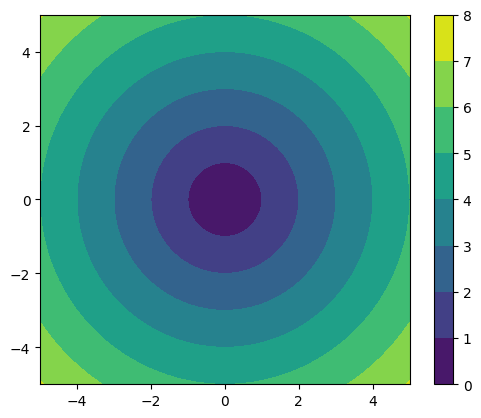

In [35]:
import matplotlib.pyplot as plt
h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()